In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("/content/hotel_Oyo.csv")

In [4]:
df.head()

,Unnamed: 0,Hotel_name,Location,Price,Discount,Rating
0,0,Capital O 80951 Hotel Radisson Suite,"India, Mumbai",2819.0,65% off,104.0
1,1,OYO SilverKey Hotel Manas Residency,"Chembur East, Mumbai",2702.0,65% off,410.0
2,2,OYO Hotel Airport Metro Near Chhatrapati Shiva...,"Andheri East, Mumbai",2289.0,64% off,879.0
3,3,Collection O Hotel Kiwi International Near Chh...,"Andheri East, Mumbai",2094.0,66% off,75.0
4,4,OYO Druv's Taj Palace Near Chhatrapati Shivaji...,"Near Asalpha Metro Station, Dhumai Estate, Mumbai",2656.0,65% off,686.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  460 non-null    int64  
 1   Hotel_name  460 non-null    object 
 2   Location    460 non-null    object 
 3   Price       418 non-null    float64
 4   Discount    418 non-null    object 
 5   Rating      438 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 21.7+ KB


In [ ]:
df['Discount'] = df['Discount'].str.replace('%', '').str.replace('off', '').astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  460 non-null    int64  
 1   Hotel_name  460 non-null    object 
 2   Location    460 non-null    object 
 3   Price       418 non-null    float64
 4   Discount    418 non-null    float64
 5   Rating      438 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 21.7+ KB


In [ ]:
df.isnull().sum()

Unnamed: 0     0
Hotel_name     0
Location       0
Price         42
Discount      42
Rating        22
dtype: int64

In [6]:

df['Price'].fillna(df['Price'].mean(), inplace=True)
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)
df['Discount'].fillna(df['Discount'].mode()[0], inplace=True)



In [ ]:
df.isnull().sum()

Unnamed: 0    0
Hotel_name    0
Location      0
Price         0
Discount      0
Rating        0
dtype: int64

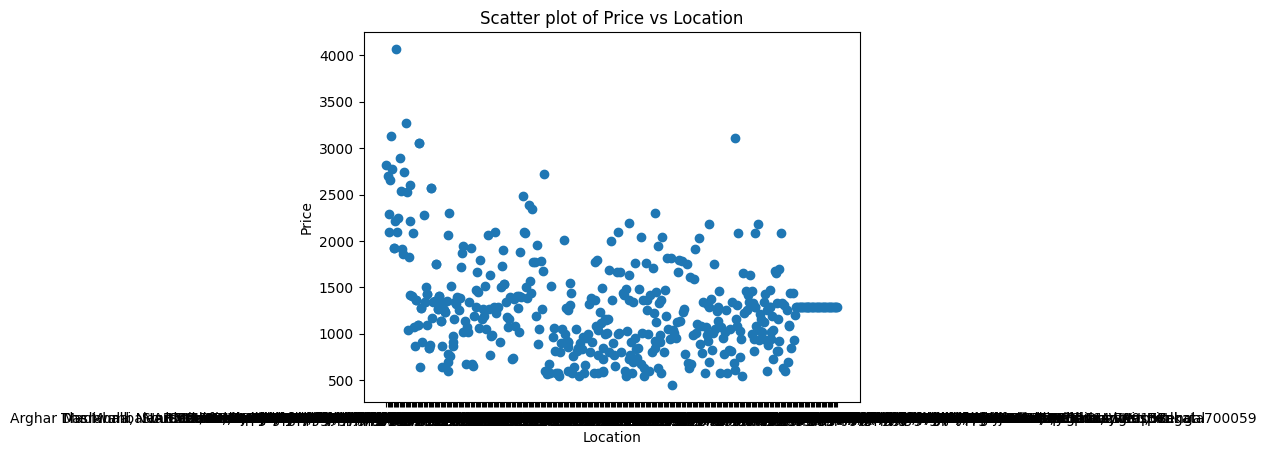

In [ ]:
plt.scatter(df['Location'], df['Price'])
plt.xlabel('Location')
plt.ylabel('Price')
plt.title('Scatter plot of Price vs Location')
plt.show()

In [ ]:
df.describe()

,Unnamed: 0,Price,Discount,Rating
count,460.000000,460.000000,460.000000,460.000000
mean,229.500000,1290.191388,66.982609,620.636986
std,132.934821,524.370906,3.732289,912.242146
min,0.000000,449.000000,47.000000,1.000000
25%,114.750000,929.000000,65.000000,65.000000
50%,229.500000,1264.000000,67.000000,321.500000
75%,344.250000,1449.750000,67.000000,795.750000
max,459.000000,4069.000000,86.000000,7398.000000


In [ ]:
corel=df.corr()
corel

<ipython-input-13-1bfec975d1d9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corel=df.corr()


,Unnamed: 0,Price,Discount,Rating
Unnamed: 0,1.000000,-0.273122,0.055359,-0.095799
Price,-0.273122,1.000000,-0.477360,0.030457
Discount,0.055359,-0.477360,1.000000,-0.005022
Rating,-0.095799,0.030457,-0.005022,1.000000


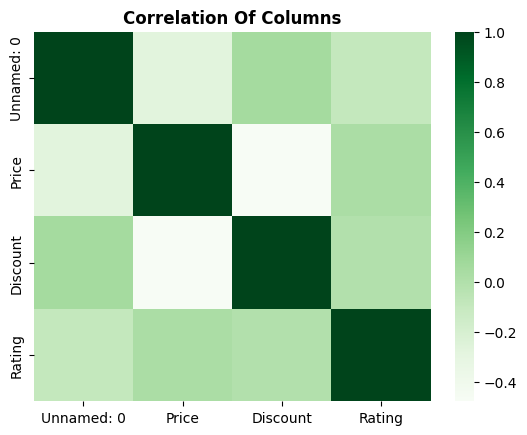

In [ ]:


sns.heatmap(corel,cmap='Greens')
plt.title("Correlation Of Columns",weight='bold')
plt.show()



In [ ]:
df[['Price', 'Discount', 'Rating']].dtypes


Price       float64
Discount    float64
Rating      float64
dtype: object

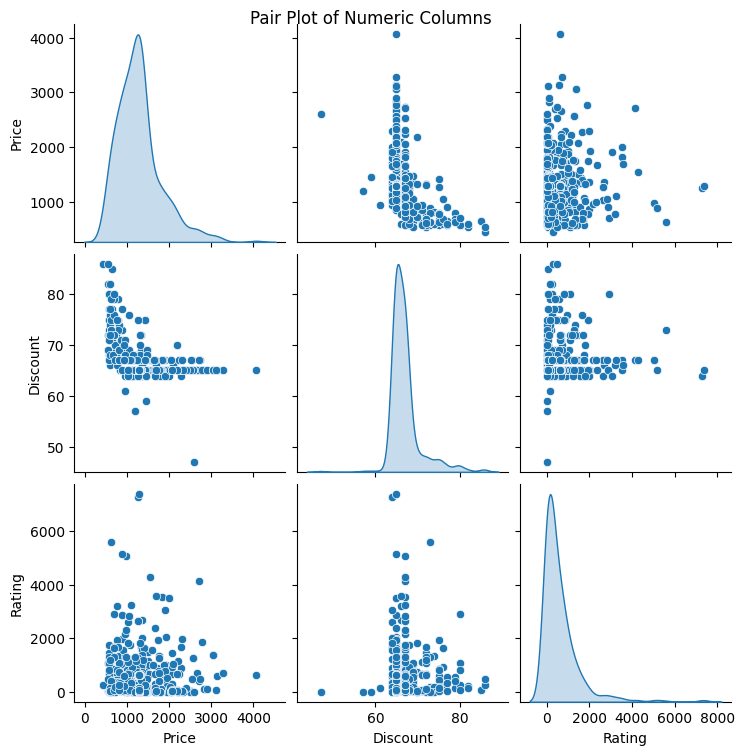

In [ ]:
sns.pairplot(df.dropna(), vars=['Price', 'Discount', 'Rating'], diag_kind='kde')
plt.suptitle('Pair Plot of Numeric Columns', y=1)
plt.show()

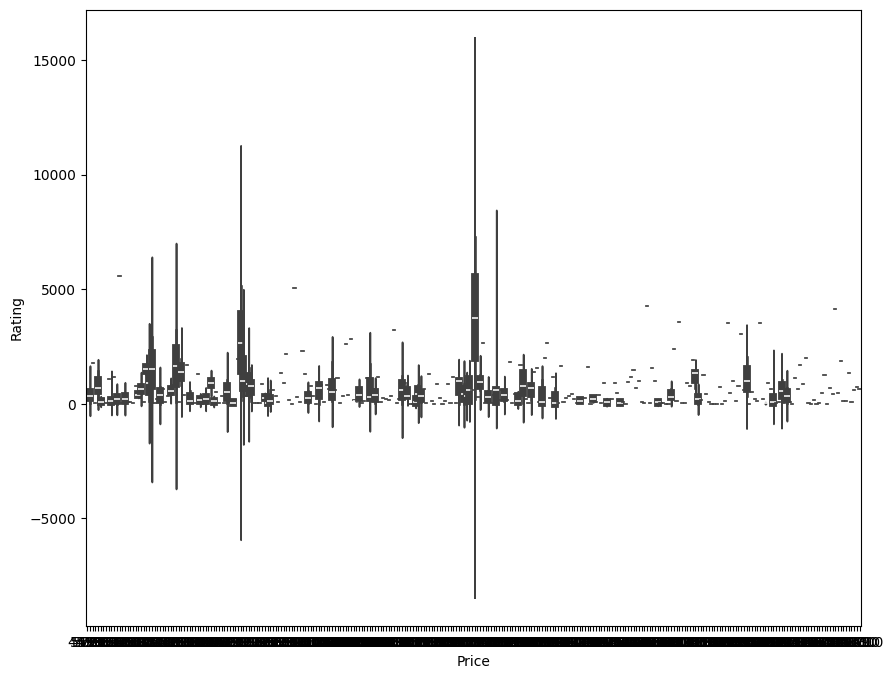

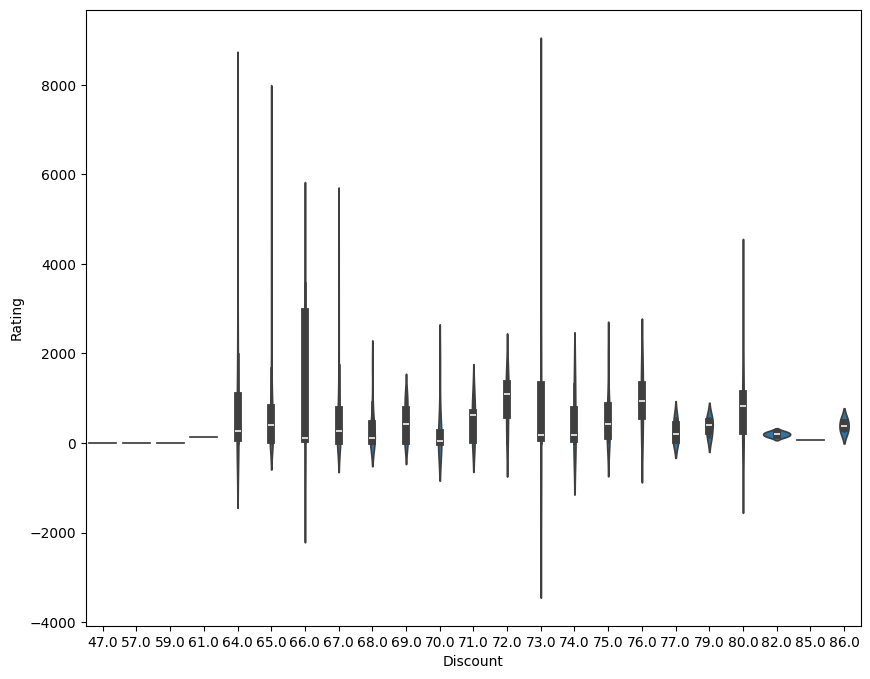

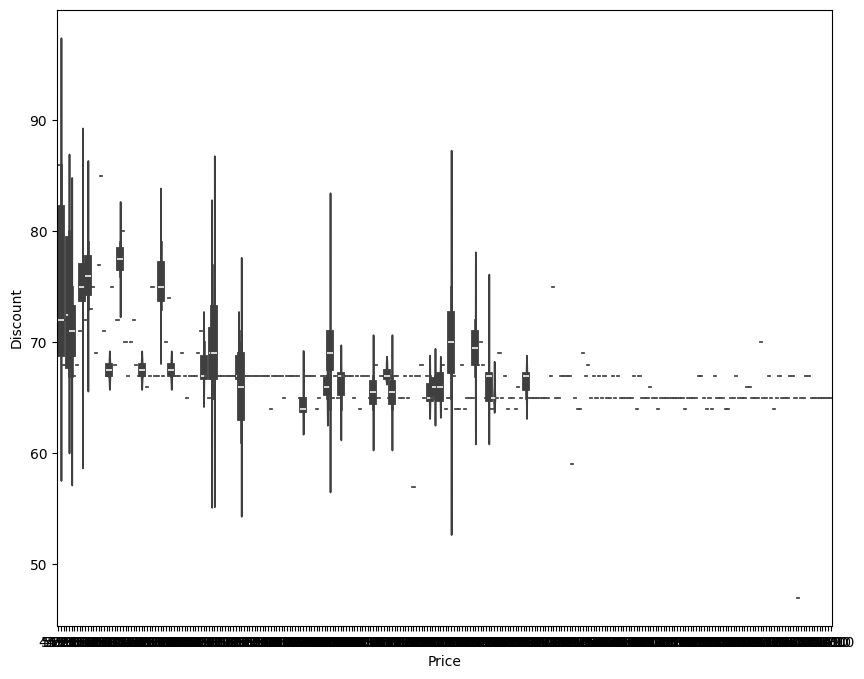

In [ ]:
plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='Price', y='Rating')
plt.show()

plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='Discount', y='Rating')
plt.show()

plt.figure(figsize=(10, 8))
sns.violinplot(data=df, x='Price', y='Discount')
plt.show()
